# __TH∆Ø VI·ªÜN__

In [22]:
import pandas as pd
import numpy as np

import torch
import torch.nn as nn

from PIL import Image

import os
import io

import easyocr
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import json
import re
import csv

reader = easyocr.Reader(['vi'])

# __D·ªÆ LI·ªÜU__

In [23]:
folder = '/content/drive/MyDrive/Sarcasm'

In [24]:
file_name = "C:/Users/pbang/Downloads/vimmsd-private-test.json"

with open(file_name, 'r', encoding='utf-8') as f:
    data = json.load(f)

df = pd.DataFrame(data)
df = df.transpose()
df.head()

image  \
0  066d6021fdfeaf39f1dec523879e8fe4d35e877abcea44...   
1  555f4787d4df49e7be743b3d5b77c90755f0d6c351f36b...   
2  7b7cdea2cde1f3f93371259b587a03f2e8c0af682b4d51...   
3  80167e59d729cf3aaba5d2d3da40db6995cb8a6a8c4a88...   
4  59db087307031d60755af3a5c01a44ba55a04bfab21027...   

                                             caption label  
0  Song Joong Ki &amp; Song Hye Kyo ƒë·ªÅu tham d·ª± B...  None  
1  Song Joong Ki &amp; Song Hye Kyo ƒë·ªÅu tham d·ª± B...  None  
2  Song Joong Ki &amp; Song Hye Kyo ƒë·ªÅu tham d·ª± B...  None  
3  Song Joong Ki &amp; Song Hye Kyo ƒë·ªÅu tham d·ª± B...  None  
4                                  Ngang tr√°i th·∫≠c ü§£  None

# __H√ÄM__

## __T√ÅCH C√ÅC V√ôNG VƒÇN B·∫¢N TRONG ·∫¢NH__

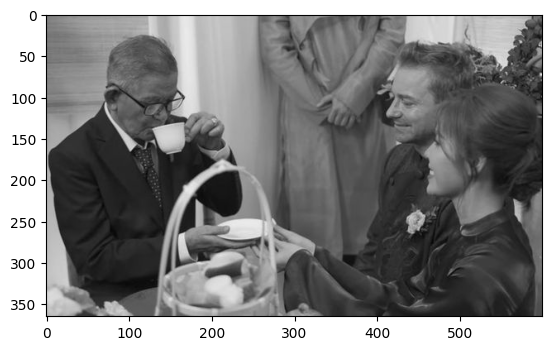

In [25]:
# ƒê∆∞·ªùng d·∫´n ƒë·∫øn ·∫£nh
image_path = "C:/Users/pbang/Downloads/private-test-images/test-images/000af5cf5da58e253d246cc1fbe8604567cb4aed9c10621d4bf5f506ededcd06.jpg"

# Load image b·∫±ng PIL
image_pil = Image.open(image_path)

# Chuy·ªÉn ƒë·ªïi t·ª´ PIL Image sang numpy array
image_np = np.array(image_pil)

# Th·ª±c hi·ªán OCR
result = reader.readtext(image_np)

# H√†m ƒë·ªÉ c·∫Øt v√† l∆∞u c√°c v√πng ch·ª©a vƒÉn b·∫£n v√†o m·ªôt danh s√°ch
def cut_text_regions(image, result):
    cropped_images = []  # Danh s√°ch ƒë·ªÉ l∆∞u c√°c h√¨nh ·∫£nh c·∫Øt ƒë∆∞·ª£c
    num_regions = len(result)

    for idx, (bbox, _, _) in enumerate(result):  # Kh√¥ng c·∫ßn vƒÉn b·∫£n, ch·ªâ c·∫ßn bbox
        # L·∫•y t·ªça ƒë·ªô bounding box
        (x0, y0), (x1, y1), (x2, y2), (x3, y3) = bbox
        x = int(min(x0, x1, x2, x3))
        y = int(min(y0, y1, y2, y3))
        w = int(max(x0, x1, x2, x3) - x)
        h = int(max(y0, y1, y2, y3) - y)

        # C·∫Øt h√¨nh ·∫£nh
        cropped_image = image.crop((x, y, x + w, y + h))

        # L∆∞u h√¨nh ·∫£nh c·∫Øt ƒë∆∞·ª£c v√†o danh s√°ch
        cropped_images.append(cropped_image)

    return cropped_images

# L∆∞u c√°c h√¨nh ·∫£nh ch·ª©a vƒÉn b·∫£n v√†o m·ªôt danh s√°ch
cropped_images_list = cut_text_regions(image_pil, result)

# H√†m ƒë·ªÉ hi·ªÉn th·ªã k·∫øt qu·∫£ OCR
def plot_ocr_results(image, result):
    plt.imshow(image)
    ax = plt.gca()

    for bbox, text, confidence in result:
        # Convert bounding box coordinates to integers
        xmin, ymin = map(int, bbox[0])
        xmax, ymax = map(int, bbox[2])

        # Create a rectangle patch for the bounding box
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none')

        # Add the patch to the plot
        ax.add_patch(rect)

        # Add the text to the plot
        plt.text(xmin, ymin, text, color='r', fontsize=8)

    plt.show()

# Hi·ªÉn th·ªã k·∫øt qu·∫£ OCR tr√™n h√¨nh ·∫£nh g·ªëc
plot_ocr_results(image_pil, result)

# T·∫°i ƒë√¢y, b·∫°n c√≥ th·ªÉ s·ª≠ d·ª•ng 'cropped_images_list' ƒë·ªÉ l√†m g√¨ ƒë√≥ v·ªõi c√°c h√¨nh ·∫£nh c·∫Øt ƒë∆∞·ª£c.

In [26]:
# Hi·ªÉn th·ªã c√°c h√¨nh ·∫£nh c·∫Øt
plt.figure(figsize=(15, 10))
for idx, img in enumerate(cropped_images_list):
    plt.subplot(1, len(cropped_images_list), idx + 1)  # T·∫°o c√°c subplots
    plt.imshow(img)  # Hi·ªÉn th·ªã h√¨nh ·∫£nh
    plt.axis('off')  # T·∫Øt tr·ª•c

plt.show()  # Hi·ªÉn th·ªã t·∫•t c·∫£ c√°c h√¨nh ·∫£nh

<Figure size 1500x1000 with 0 Axes>

In [27]:
# Hi·ªÉn th·ªã t·ª´ng h√¨nh ·∫£nh trong danh s√°ch cropped_images_list
def display_cropped_images(cropped_images):
    for idx, cropped_image in enumerate(cropped_images):
        plt.figure(figsize=(5, 5))
        plt.imshow(cropped_image)
        plt.axis('off')  # T·∫Øt tr·ª•c
        plt.show()

# G·ªçi h√†m ƒë·ªÉ hi·ªÉn th·ªã c√°c h√¨nh ·∫£nh c·∫Øt ƒë∆∞·ª£c
display_cropped_images(cropped_images_list)

## __ƒê·ªåC VƒÇN B·∫¢N TRONG ·∫¢NH ƒê√É C·∫ÆT__

In [28]:
# ! wget https://vocr.vn/data/vietocr/sample.zip
# ! unzip  -qq -o sample.zip
# ! ls sample | shuf |head -n 5

In [29]:
# pip install vietocr

In [30]:
from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

config = Cfg.load_config_from_name('vgg_transformer')
detector = Predictor(config)

c:\Users\pbang\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Model weight C:\Users\pbang\AppData\Local\Temp\vgg_transformer.pth exsits. Ignore download!


C:\Users\pbang\AppData\Roaming\Python\Python312\site-packages\vietocr\tool\predictor.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(we

In [31]:
def display_and_predict(cropped_images):
    results = []

    for idx, cropped_image in enumerate(cropped_images):
        text = detector.predict(cropped_image)
        results.append(text)

    return results

predicted_texts = display_and_predict(cropped_images_list)

In [32]:
df['image'].head()

0    066d6021fdfeaf39f1dec523879e8fe4d35e877abcea44...
1    555f4787d4df49e7be743b3d5b77c90755f0d6c351f36b...
2    7b7cdea2cde1f3f93371259b587a03f2e8c0af682b4d51...
3    80167e59d729cf3aaba5d2d3da40db6995cb8a6a8c4a88...
4    59db087307031d60755af3a5c01a44ba55a04bfab21027...
Name: image, dtype: object

In [33]:
with open('text_in_image.csv','w', newline='', encoding='utf-16') as file_output:
  headers = ['Label']
  writer = csv.DictWriter(file_output, delimiter =',', lineterminator = '\n' , fieldnames = headers)
  writer.writeheader()  
  for idx, row in df.iterrows():

    image_path = "C:/Users/pbang/Downloads/private-test-images/test-images/" + row['image']
    image_pil = Image.open(image_path)

    image_np = np.array(image_pil)
    result = reader.readtext(image_np)

    cropped_images_list = cut_text_regions(image_pil, result)

    predicted_texts = display_and_predict(cropped_images_list)

    # if(len(predicted_texts) > 0):
    final_text = ' '.join(predicted_texts)
    print(row['image'], final_text)
    writer.writerow({headers[0]:final_text})
    print()

066d6021fdfeaf39f1dec523879e8fe4d35e877abcea44c428d45e1b81554444.jpg LINVE

555f4787d4df49e7be743b3d5b77c90755f0d6c351f36b02c364775d5929b7c4.jpg Wileup

7b7cdea2cde1f3f93371259b587a03f2e8c0af682b4d519ef752706d83627d2c.jpg AMANYMS Brizm LINVE

80167e59d729cf3aaba5d2d3da40db6995cb8a6a8c4a8896f705967c93073390.jpg Brizm LINVE

59db087307031d60755af3a5c01a44ba55a04bfab210273c6b55b29b30e46000.jpg m 12 GNOGASA ROUP FAN MUS·∫º TH·∫§Y TH·∫¨T L√Ä C·∫¢M GI√ÅC KHI CH·ª®NG KI·∫æN M·∫§Y TI·ªÄN ƒê·∫†O ƒê·ªòI M√åNH PH·∫æ VCH C√íN NG∆Ø·ªúI B·ªä ƒê·∫®Y ƒêI TH√å TR·ªû TH√ÄNH C·∫¶U TH·ª¶ HAY NH·∫§T M√ôA C·ª¶A GETAFE facebookcom/trollbongdate youtubes com/trollbongdaofficial

890afe8876f613a6db0c9585c3167f59a1b28600d675ff7baadae56e4531c160.jpg GONG SHOWLING

e981cca991e528b2f84a5ee5f4dbf5b3af760cfb8c2d27cb49fa123b90c317fb.jpg 

e0c20657e0af9eb96209b694837986df6fd87b1f61746d157b3dbb65eb51fb31.jpg b√© ch·ªçn NT JAI ADS

aa24511fde138e0c83e9a17201f1094b5f9db0065aac09bc66d20f6a9f1ecad1.jpg co BESTOOM nad

4f9d

C:\Users\pbang\AppData\Roaming\Python\Python312\site-packages\vietocr\tool\translate.py:115: RuntimeWarning: invalid value encountered in divide
  char_probs = np.sum(char_probs, axis=-1)/(char_probs>0).sum(-1)


7b4a29d75544eadcbb016ab5cddadce00e1bd40e3b30d19b608983d636af07c0.jpg Ahnoe 

56025b2c8c6942300367dd3c50f8a951c1ad384c813fb7fbea379567b6999997.jpg REFUND MISS

fcd0a898a47b2c5a3eaf063e9175714e8eb295b9095fba13faf4d1d7b6858778.jpg REF MIS

990e6ebd54ac002f028b405256bbf80b1f90eb0d2760456a4b7bcdc362e47eb4.jpg N√≥i g√¨ ƒë√≥ d∆° b·∫©n v·ªõi e ƒëi2 s·ª≠a xe ƒë√≥a e.A gi√† n∆° √¥ng garel trollxe H·ªìi h√≥t √¥ng cho qu√°

21b55b10f66001ea74a1191950a5a72aca92a62393c3986ddbb9cfba4501f58e.jpg H·ªìng H√≥t Showbiz

c560cdb2bf88e3560a43fab023284773e40f3c73ad873891224244b7951f3577.jpg 

b12d1ce96c4fd96956b5c746ee2e0fca14274f8e5b4840fd4d8a917f1494170a.jpg 

adc3277e67c747fa29116433f1b331cdb474163230db3938eda02dc7688b73c8.jpg 

a2660594958c6facb685e70f0fdab2dbd3be7beb8966d11af4bb1d19a8a34e0a.jpg ctz LIMIT HE

7890019f6eaa5da1ddcf478661f48b282b2a776d5bea473805dc5c5419d18af8.jpg 

0c18bf1bbd7dceab8401994fa1387d51532761776c8620710e795830115b74d7.jpg TH√ÅNG SINH - ƒê·ªí CH∆†I C·ª¶A M√ÄI TH√ÅNG 1 TH√ÅNG 2 TH√

In [34]:
data_frame = pd.read_csv("C:/Users/pbang/Downloads/text_in_image.csv", encoding='utf-16')


In [35]:
data_frame.shape

(1504, 1)

In [36]:
df['image']

0       066d6021fdfeaf39f1dec523879e8fe4d35e877abcea44...
1       555f4787d4df49e7be743b3d5b77c90755f0d6c351f36b...
2       7b7cdea2cde1f3f93371259b587a03f2e8c0af682b4d51...
3       80167e59d729cf3aaba5d2d3da40db6995cb8a6a8c4a88...
4       59db087307031d60755af3a5c01a44ba55a04bfab21027...
                              ...                        
1499    3c643826258f8aacc8a98d8e24956f909797010f1e80bd...
1500    09f5adf3e555d3066eae0be356e5ce797c066706e7c808...
1501    b11515c1aa521da4f6d0cd6464e5ea3e030662cdd43f7f...
1502    8a83634808704a5c7493327893f793effd6e78cb037ac4...
1503    20f81dd1d0329d6b7e5778304422a3621dae460a433ac2...
Name: image, Length: 1504, dtype: object

In [37]:
data_frame['image']= list(df['image'])
data_frame

Label  \
0                                                 LINVE   
1                                                Wileup   
2                                   AMANYMS Brizm LINVE   
3                                           Brizm LINVE   
4     m 12 GNOGASA ROUP FAN MUS·∫º TH·∫§Y TH·∫¨T L√Ä C·∫¢M GI...   
...                                                 ...   
1499  Th·∫Øng Cu·ªôi 1 gi·ªù M·∫π b·∫£o hai ƒë·ª©a n√™n ƒëi t·∫≠p gym...   
1500  A/ KFC] T·ª™ ƒÇN L·∫§Y H√äN ƒêI CON, COMBO L·ªòC PH√öC V...   
1501  B√âO [RA R·ªíI SU·ªêT NG√ÄY ƒÇN V·ªöI NG·ª¶, PH·∫¢I KI·ªÇM SO...   
1502  24 09638222222 Mediavtv24eagmall.com 76% s·ªë ca...   
1503  HATTIEU CHANNETS em qua nh√† m·∫π ch·ªìng tr·ªï t√†i n...   

                                                  image  
0     066d6021fdfeaf39f1dec523879e8fe4d35e877abcea44...  
1     555f4787d4df49e7be743b3d5b77c90755f0d6c351f36b...  
2     7b7cdea2cde1f3f93371259b587a03f2e8c0af682b4d51...  
3     80167e59d729cf3aaba5d2d3da40db6995cb8a6a8c4a88...  
4     59db087307031d60755af3a5c01a44ba55a04bfab21027...  
...                                                 ...  
1499  3c643826258f8aacc8a98d8e24956f909797010f1e80bd...  
1500  09f5adf3e555d3066eae0be356e5ce797c066706e7c808...  
1501  b11515c1aa521da4f6d0cd6464e5ea3e030662cdd43f7f...  
1502  8a83634808704a5c7493327893f793effd6e78cb037ac4...  
1503  20f81dd1d0329d6b7e5778304422a3621dae460a433ac2...  

[1504 rows x 2 columns]

In [38]:
data_frame.to_csv("C:/Users/pbang/Downloads/file_text_in_image.csv", encoding='utf-8', index=False)

In [39]:
data_frame.to_excel("C:/Users/pbang/Downloads/file_text_in_image.xlsx", index=False)

In [40]:
df_ex = pd.read_excel("C:/Users/pbang/Downloads/file_test.xlsx") 

In [41]:
df_ex

Label  \
0     Monday at 11:41 AM Title: S·∫Øp c√≥ ƒë·ª£t n√≥ng 45 ƒë...   
1     s2.heartbreak Senior Member Today at 12:39 AM ...   
2     Pin m·∫∑t tr·ªùi khi·∫øn gi√° ƒëi·ªán √¢m ·ªü California M·ªπ...   
3     CrisDevilGamer V·ª´a xong H∆∞ng Theodon v√† s√¢n n√†...   
4                                                   NaN   
...                                                 ...   
1408  Nguy·ªÖn M·∫°nh L√Ω Theo d√µi chu·ªôt g√¨ th·∫ø b√°c -))) ...   
1409  G·∫∑p L·∫°i Ph·∫°m Minh sao em nh√¨n con n√†y v·ªõi tr√™n...   
1410  Ph·∫°m Minh T√°c gi·∫£ Thanh Thuy uhm e b·∫Øt n√≥ m√† b...   
1411  T·ª´ T·∫•n B·ª≠u Ph·∫°m Minh hamster h√£ b√°c 2 ng√†y Th√≠...   
1412  Ch·ªïn L√¥ng L√¢y lem xinh qu√° C∆∞·ªõi a nha 2:26 PM ...   

                                                  image  
0     bb934d7d7f7652903c24272d405e4b31c70689cec93f86...  
1     449a108232be3d220679d7c500ee0aa3203920c0116319...  
2     2c17cee0245711376b566a65d1a9d25066317fc894fc0a...  
3     f5103b29053845e84baabbf4111b83fa9150f2aaa5e605...  
4     679e017d422dae281efdc2e2500668e2618603da93d21d...  
...                                                 ...  
1408  c0126eb4dcba36f3174cc45b5ed15f9ddb4fb5bb66d3fc...  
1409  b493dd2d61c2e9371cc04de9f4d0182249613a11197052...  
1410  2ba9d6a713df23c4176bbddfd93bf30a7b21da06a0fb67...  
1411  17ab70c64ccf16707c51d5b77ab9fc2718471232218bcf...  
1412  c4500bd5195e43e2d9c5987c86c5782dad018e83c8dacf...  

[1413 rows x 2 columns]